In [1]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
#https://docs.python.org/3/library/imghdr.html
import cv2
import imghdr
import matplotlib.pyplot as plt

In [3]:
data_dir='/content/drive/MyDrive/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

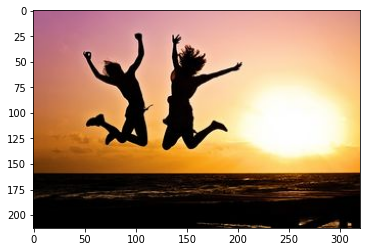

In [4]:
img=cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
os.listdir(data_dir)

['happy', 'sad']

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['image32.png',
 'images13.jpg',
 'image17.jpeg',
 'images14.jpg',
 'images16.jpg',
 'happinessa.jpg',
 'GettyImages-565706549-949x534.jpg',
 'image22.jpeg',
 'happy-people.jpg',
 'images11.jpg',
 'image8.jpeg',
 'image14.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'image16.jpeg',
 'image23.jpeg',
 'image31.jpeg',
 'Your-Words-Affect-Your-Mind-10-Things-Happy-People-Say-Every-Day.jpg',
 'image9.jpeg',
 'image4.jpeg',
 'what-makes-people-happy.jpeg',
 'images15.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'images25.jpg',
 'image20.jpeg',
 'images9.jpg',
 'iStock-1212931050.jpg',
 'image30.jpeg',
 'image.jpeg',
 'happy-people-1024x768.jpeg',
 'images20.jpg',
 'images10.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'maxresdefault.jpg',
 'image26.jpeg',
 'image11.jpeg',
 'happy-person.jpeg',
 'images8.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'image6.jpeg',
 'ADea4I52NLfuTb6G2aLGZIVr6FM9OLTqdAo7bWGOnbdFs64-c-mo.jpg',
 'what-makes-people-happy1.jpg',
 'imag

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Load Data

In [9]:
import numpy as np

In [10]:
tf.keras.utils.image_dataset_from_directory??

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
print(type(data))

Found 289 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [12]:
data_iterator = data.as_numpy_iterator()
print(type(data_iterator))

<class 'tensorflow.python.data.ops.dataset_ops._NumpyIterator'>


In [13]:
batch = data_iterator.next()
print(len(batch))

2


In [14]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

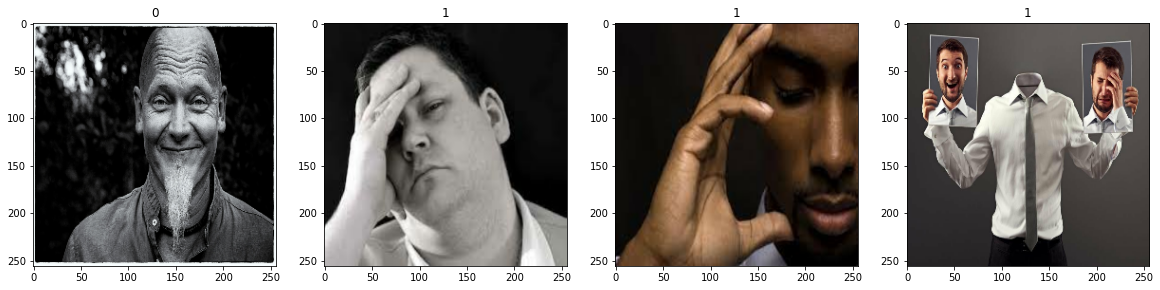

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 1= 'Sad'
Class 0= 'Happy

Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
len(data)

10

In [19]:
data.as_numpy_iterator().next()[0].max()

1.0

Split Data

In [20]:
np.take??

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building Deep Learning Mode

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

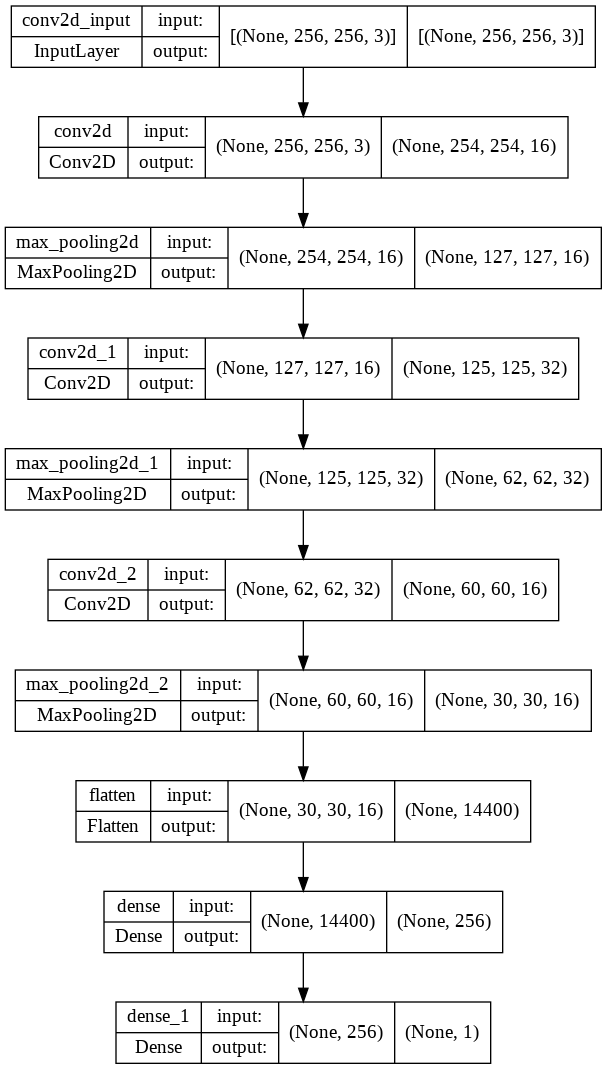

In [27]:
tf.keras.utils.plot_model(model, to_file='imgg.png', show_shapes=True)

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 20s 960ms/step - loss: 0.8260 - accuracy: 0.5714 - val_loss: 0.6797 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 9s 940ms/step - loss: 0.6615 - accuracy: 0.5536 - val_loss: 0.6519 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 9s 930ms/step - loss: 0.6355 - accuracy: 0.6786 - val_loss: 0.5302 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 9s 929ms/step - loss: 0.5175 - accuracy: 0.8036 - val_loss: 0.3539 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 7s 593ms/step - loss: 0.4425 - accuracy: 0.8125 - val_loss: 0.5095 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 9s 929ms/step - loss: 0.4289 - accuracy: 0.8438 - val_loss: 0.3736 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 9s 943ms/step - loss: 0.3375 - accuracy: 0.8795 - val_loss: 0.1726 - val_accuracy: 0.9375
Epoch 8/20
7/7 [===

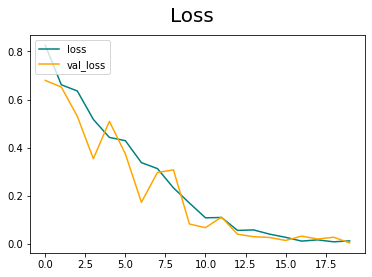

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

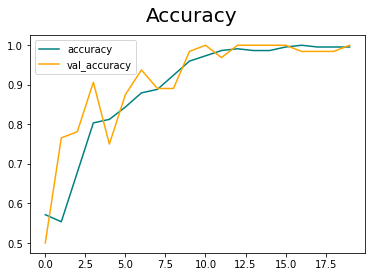

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

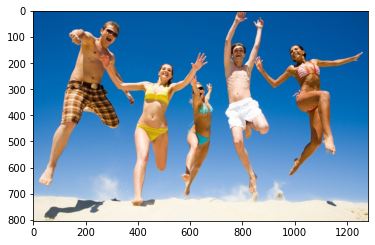

In [36]:
img=cv2.imread(os.path.join(data_dir,'happy','1902540.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

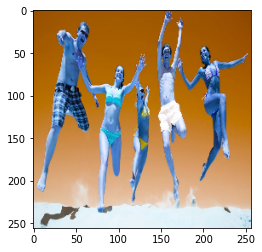

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','imageclassifier.h5'))